In [1]:
import pandas as pd

#Loading the data 
data = pd.read_csv(r"C:\Users\samue\OneDrive\Desktop\Data Science FP\Preprocessing\2021-2024 data.csv")




In [2]:
#Checking for the data type and missing values 
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1352 entries, 0 to 1351
Data columns (total 35 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Player   1352 non-null   object 
 1   Nation   1352 non-null   object 
 2   Pos      1352 non-null   object 
 3   Squad    1352 non-null   object 
 4   Age      1352 non-null   int64  
 5   Born     1352 non-null   int64  
 6   GCA      1352 non-null   int64  
 7   GCA90    1352 non-null   float64
 8   Gls      1352 non-null   int64  
 9   G-PK     1352 non-null   int64  
 10  Sh       1352 non-null   int64  
 11  SoT      1352 non-null   int64  
 12  SoT%     1352 non-null   float64
 13  Sh/90    1352 non-null   float64
 14  SoT/90   1352 non-null   float64
 15  G/Sh     1352 non-null   float64
 16  G/SoT    1352 non-null   float64
 17  Dist     1352 non-null   float64
 18  PK       1352 non-null   int64  
 19  PKatt    1352 non-null   int64  
 20  xG       1352 non-null   float64
 21  npxG     1352 

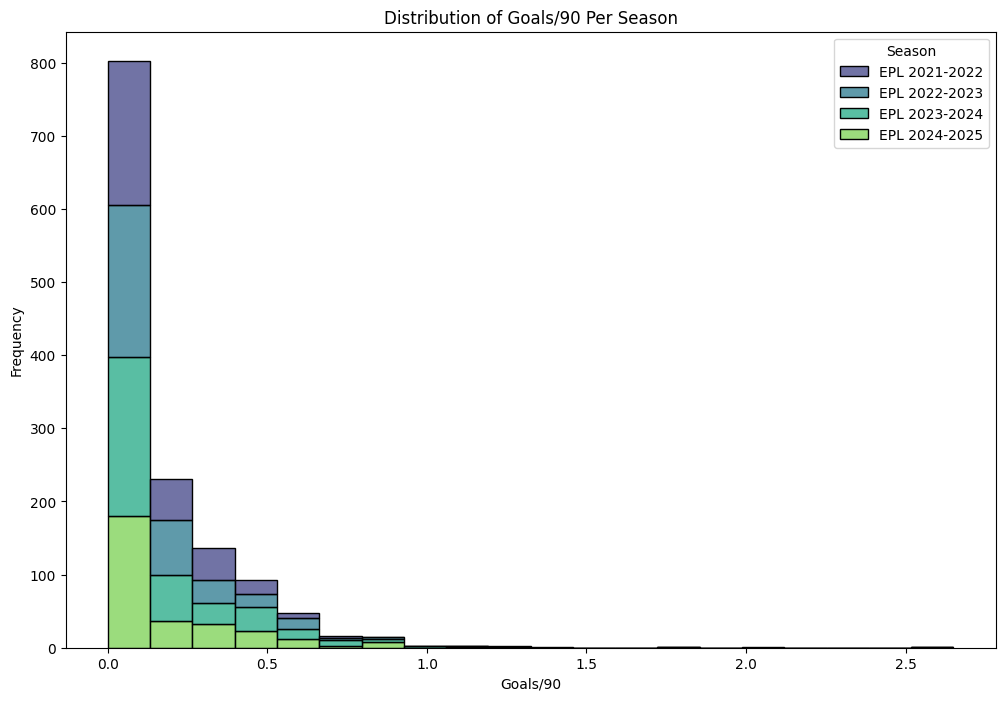

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns



#Plot the distribution of goals/90
plt.figure(figsize=(12, 8))

# Create a seaborn FacetGrid to plot the distribution of Goals/90 per season
sns.histplot(data=data, x = 'Gls/90', hue='Season', multiple='stack', bins=20, palette='viridis')

# Add titles and labels
plt.title('Distribution of Goals/90 Per Season')
plt.xlabel('Goals/90')
plt.ylabel('Frequency')

# Show the plot
plt.show()



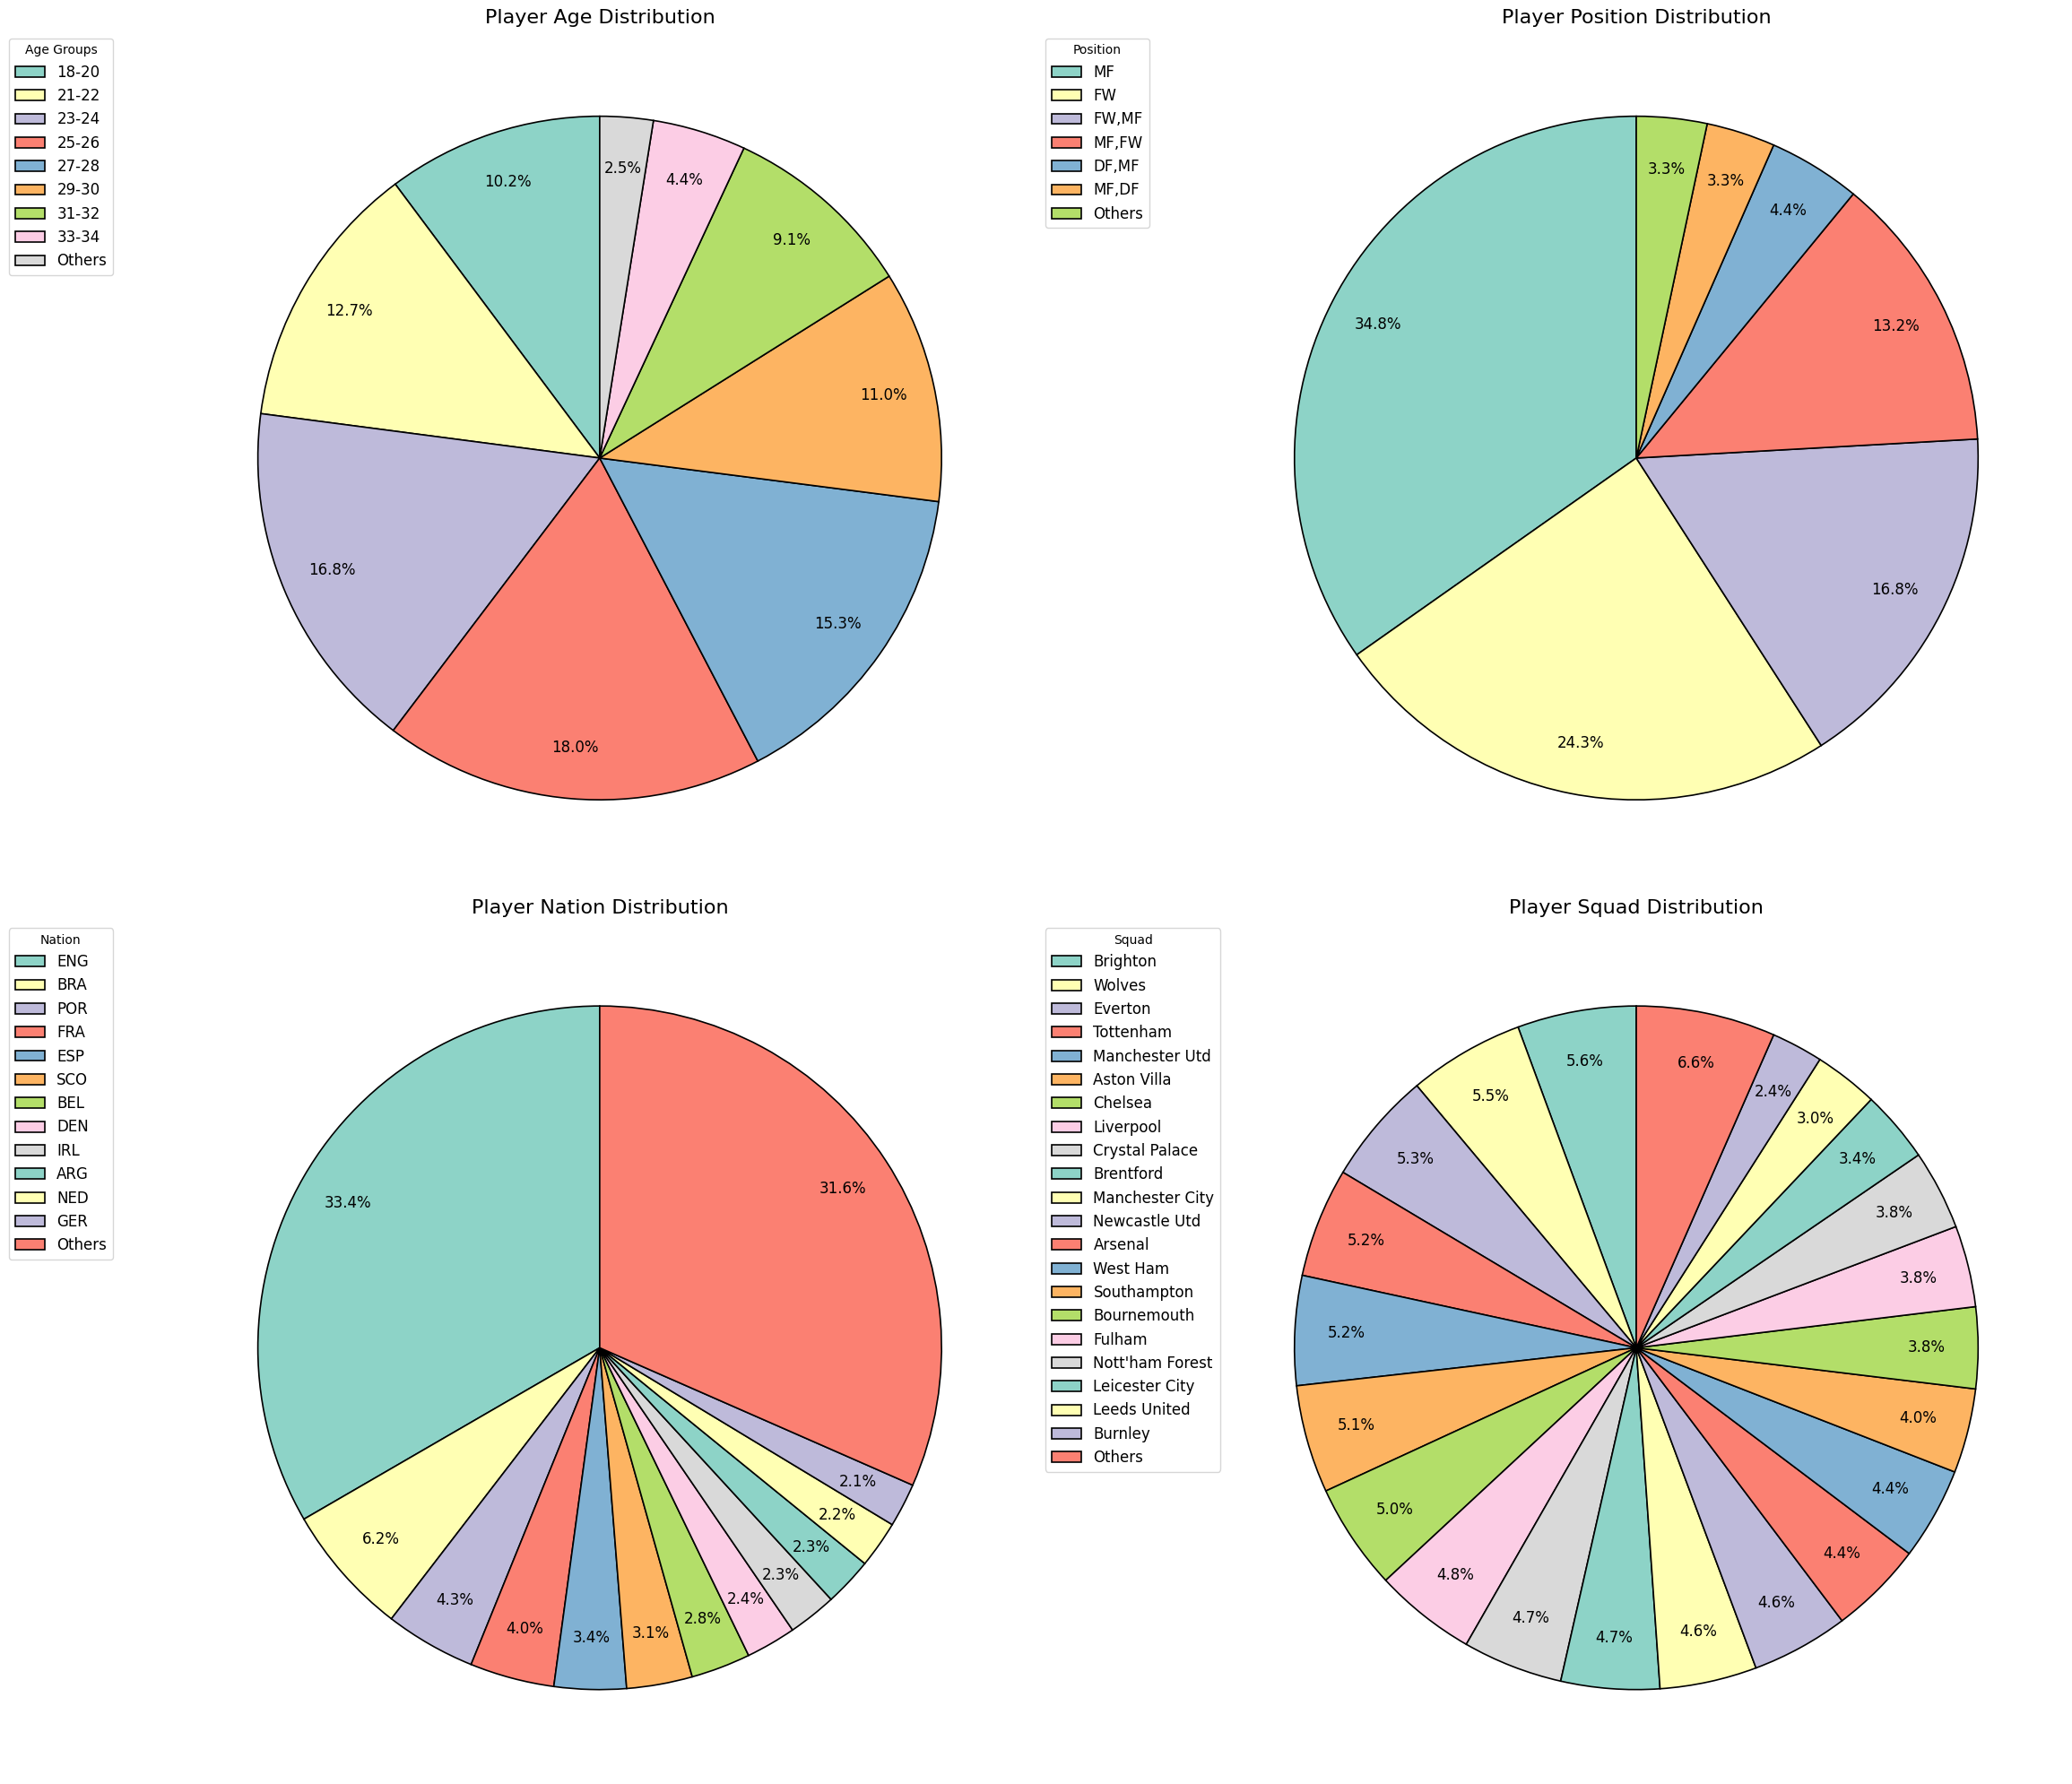

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# Visualize data using pie chart 

# Defining the age bins and labels for those bins
bins = [18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42] 
labels = ['18-20', '21-22', '23-24', '25-26', '27-28', '29-30', '31-32', '33-34', '35-36', '37-38', '39-40', '41-42']

# Making age group based on the bins and labels
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)  

# Calculating value counts to find the distribution
age_distribution = data['AgeGroup'].value_counts()
position_distribution = data['Pos'].value_counts()  
nation_distribution = data['Nation'].value_counts()  
squad_distribution = data['Squad'].value_counts()  

# Function to combine categories that have a value of less than 2% into others category
def combining_small_categories(distribution, threshold=0.02):  
    total = distribution.sum()
    others = distribution[distribution / total < threshold]
    distribution = distribution[distribution / total >= threshold]
    distribution['Others'] = others.sum()
    return distribution

# Applying the function to combine the categories that have a value of less than 2%
age_distribution = combining_small_categories(age_distribution)
position_distribution = combining_small_categories(position_distribution)
nation_distribution = combining_small_categories(nation_distribution)
squad_distribution = combining_small_categories(squad_distribution)

# Sorting age groups in ascending order
age_distribution_sorted = age_distribution.sort_index()

# Applying more distinct colors for better visuals
colors = sns.color_palette("Set3", n_colors=len(age_distribution_sorted))

# Plotting Age, Position, Nation, and Squad distributions in different charts
plt.figure(figsize=(24, 20))  

# Plot for Age distribution
plt.subplot(2, 2, 1)
plt.pie(age_distribution_sorted, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'black', 'linewidth': 1.2},
        pctdistance=0.85, textprops={'fontsize': 12})  
plt.title('Player Age Distribution', fontsize=16)
plt.legend(age_distribution_sorted.index, title="Age Groups", loc='upper left', fontsize=12, bbox_to_anchor=(-0.2, 1))  
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Plot for Position distribution
plt.subplot(2, 2, 2)
plt.pie(position_distribution, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'black', 'linewidth': 1.2},
        pctdistance=0.85, textprops={'fontsize': 12})  
plt.title('Player Position Distribution', fontsize=16)
plt.legend(position_distribution.index, title="Position", loc='upper left', fontsize=12, bbox_to_anchor=(-0.2, 1))  
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Plot for Nation distribution
plt.subplot(2, 2, 3)
plt.pie(nation_distribution, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'black', 'linewidth': 1.2},
        pctdistance=0.85, textprops={'fontsize': 12})  
plt.title('Player Nation Distribution', fontsize=16)
plt.legend(nation_distribution.index, title="Nation", loc='upper left', fontsize=12, bbox_to_anchor=(-0.2, 1))  
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Plot for Squad distribution
plt.subplot(2, 2, 4)
plt.pie(squad_distribution, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'black', 'linewidth': 1.2},
        pctdistance=0.85, textprops={'fontsize': 12})  
plt.title('Player Squad Distribution', fontsize=16)
plt.legend(squad_distribution.index, title="Squad", loc='upper left', fontsize=12, bbox_to_anchor=(-0.2, 1))  
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()


C:\Users\samue\AppData\Local\Temp\ipykernel_8664\2118150027.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pos', y='Gls/90', data=data, palette='Set2')


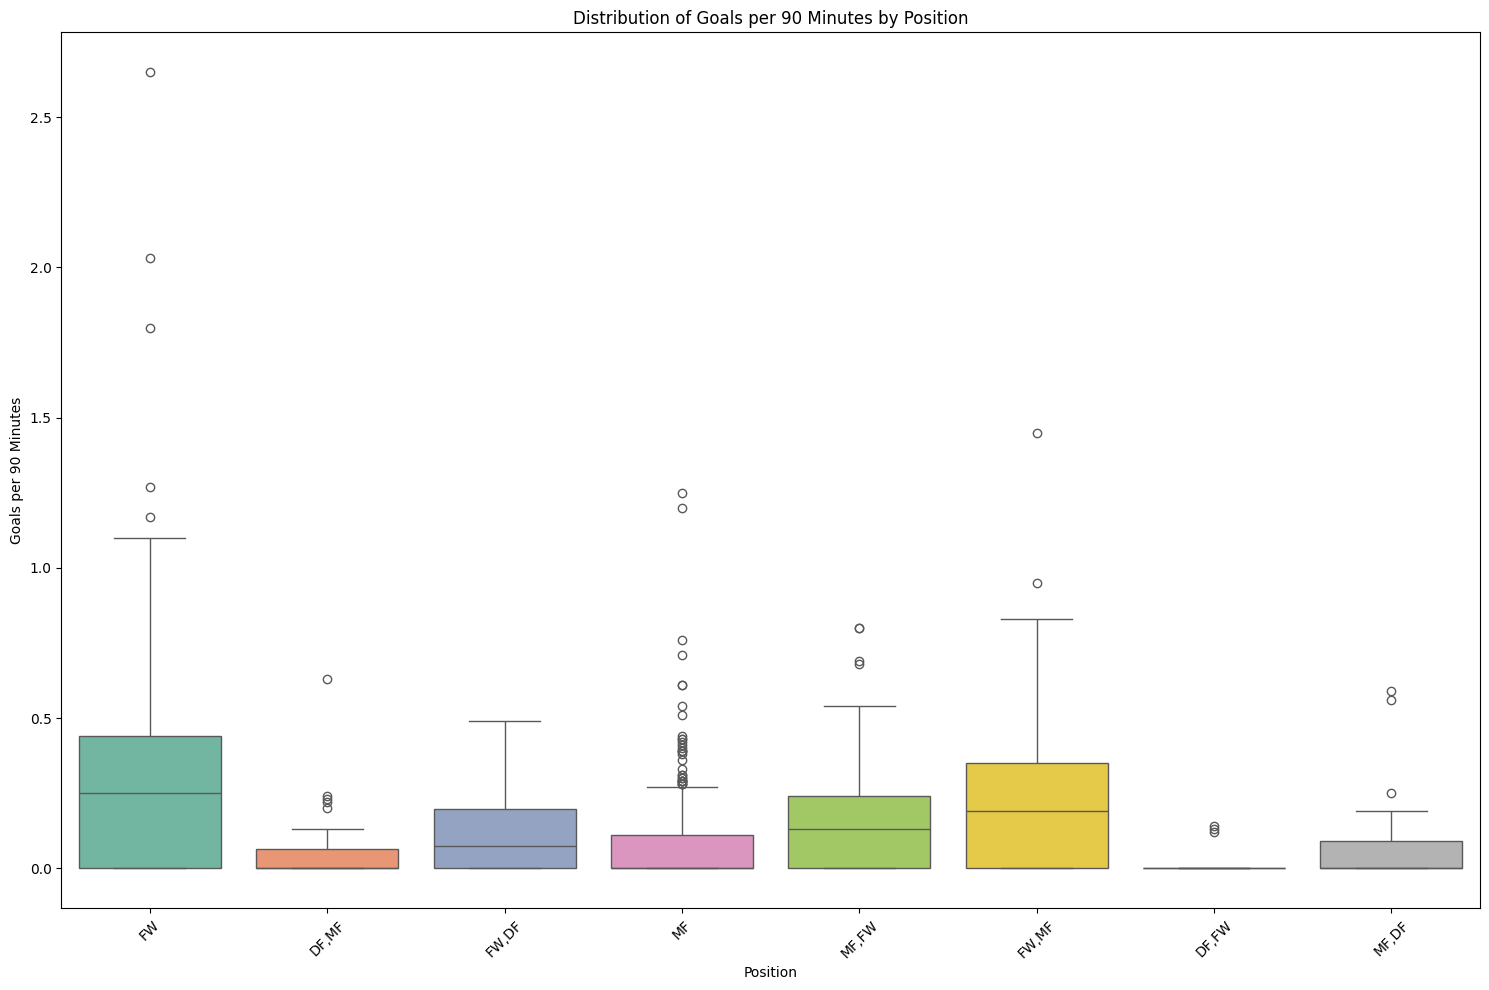

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

#Creating box plot to spot outlier in the goals/90 

# Create the box plot
plt.figure(figsize=(15, 10))
sns.boxplot(x='Pos', y='Gls/90', data=data, palette='Set2')

# Adding labels and title
plt.xlabel('Position')
plt.ylabel('Goals per 90 Minutes')
plt.title('Distribution of Goals per 90 Minutes by Position')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Test Mean Squared Error: 0.0011035984214842257
Test R-squared: 0.9769350211188559
    Feature  Importance
6      G/Sh    0.607960
5    SoT/90    0.164794
9     xG/90    0.089100
7     G/SoT    0.051854
4     Sh/90    0.037765
2       90s    0.014965
8        PK    0.010544
10  np:G-xG    0.008168
1       Age    0.002844
11     Dist    0.002686
3     GCA90    0.002607
12    Squad    0.002557
13   Nation    0.001750
14   Season    0.001221
0       Pos    0.000709
15  Cluster    0.000477


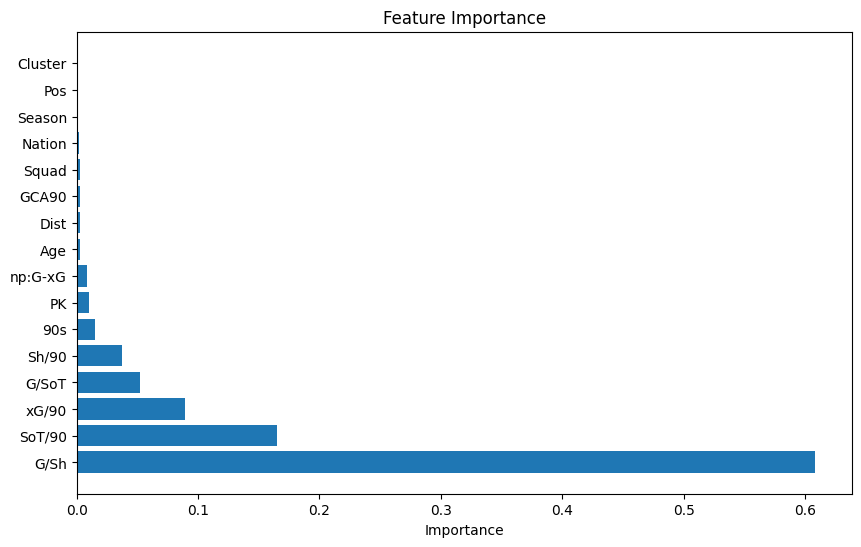

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# Define features and target
features = ['Pos','Age','90s','GCA90','Sh/90','SoT/90','G/Sh','G/SoT','PK','xG/90','np:G-xG','Dist','Squad','Nation', 'Season','Cluster']
target = 'Gls/90'

# Apply a cap to the target variable
data['Gls/90'] = data['Gls/90'].apply(lambda x: min(x, 1.2))


# Encode categorical features
label_encoders = {}
for col in ['Nation', 'Pos', 'Squad', 'Season']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Define features (X) and target (y)
X = data[features]
y = data[target]



# 1. Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# 2. Initialize RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# 3. Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search.fit(X, y)

# 4. Retrieve the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# 5. Use best parameters to initialize RandomForestRegressor
optimized_model = RandomForestRegressor(**best_params, random_state=42)

# 6. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Train the optimized model
optimized_model.fit(X_train, y_train)

# 8. Predict and Evaluate
y_pred = optimized_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print(f"Test Mean Squared Error: {test_mse}")
print(f"Test R-squared: {test_r2}")

# Feature importance
importances = optimized_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()



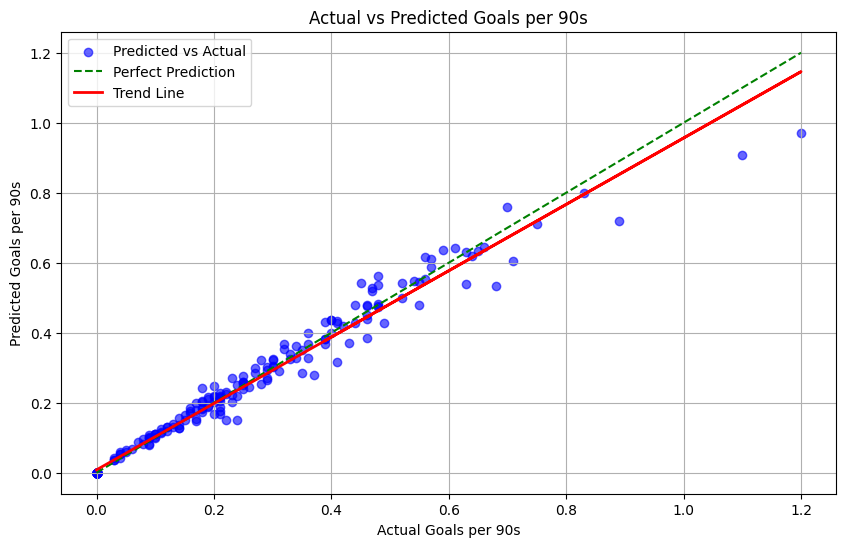

In [7]:


import numpy as np 
from sklearn.linear_model import LinearRegression

# Create a scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual', alpha=0.6)

# Plot the line of perfect prediction 
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', label='Perfect Prediction', linestyle='--')

# Fit a trend line using a linear regression 
trend_model = LinearRegression()
y_test_reshaped = np.array(y_test).reshape(-1, 1)  
trend_model.fit(y_test_reshaped, y_pred)  
trend_line = trend_model.predict(y_test_reshaped)  

# Add the trend line to the plot
plt.plot(y_test, trend_line, color='red', label='Trend Line', linewidth=2)

# Add labels, title, and legend
plt.xlabel('Actual Goals per 90s')
plt.ylabel('Predicted Goals per 90s')
plt.title('Actual vs Predicted Goals per 90s')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()



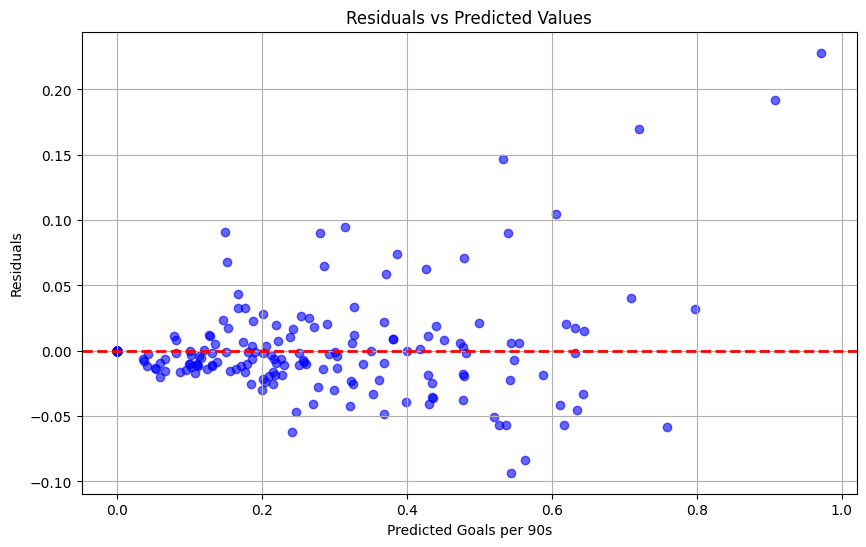

In [8]:
#Plotting residuals
#Formula for calculating the residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Predicted Goals per 90s')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.grid(True)
plt.show()

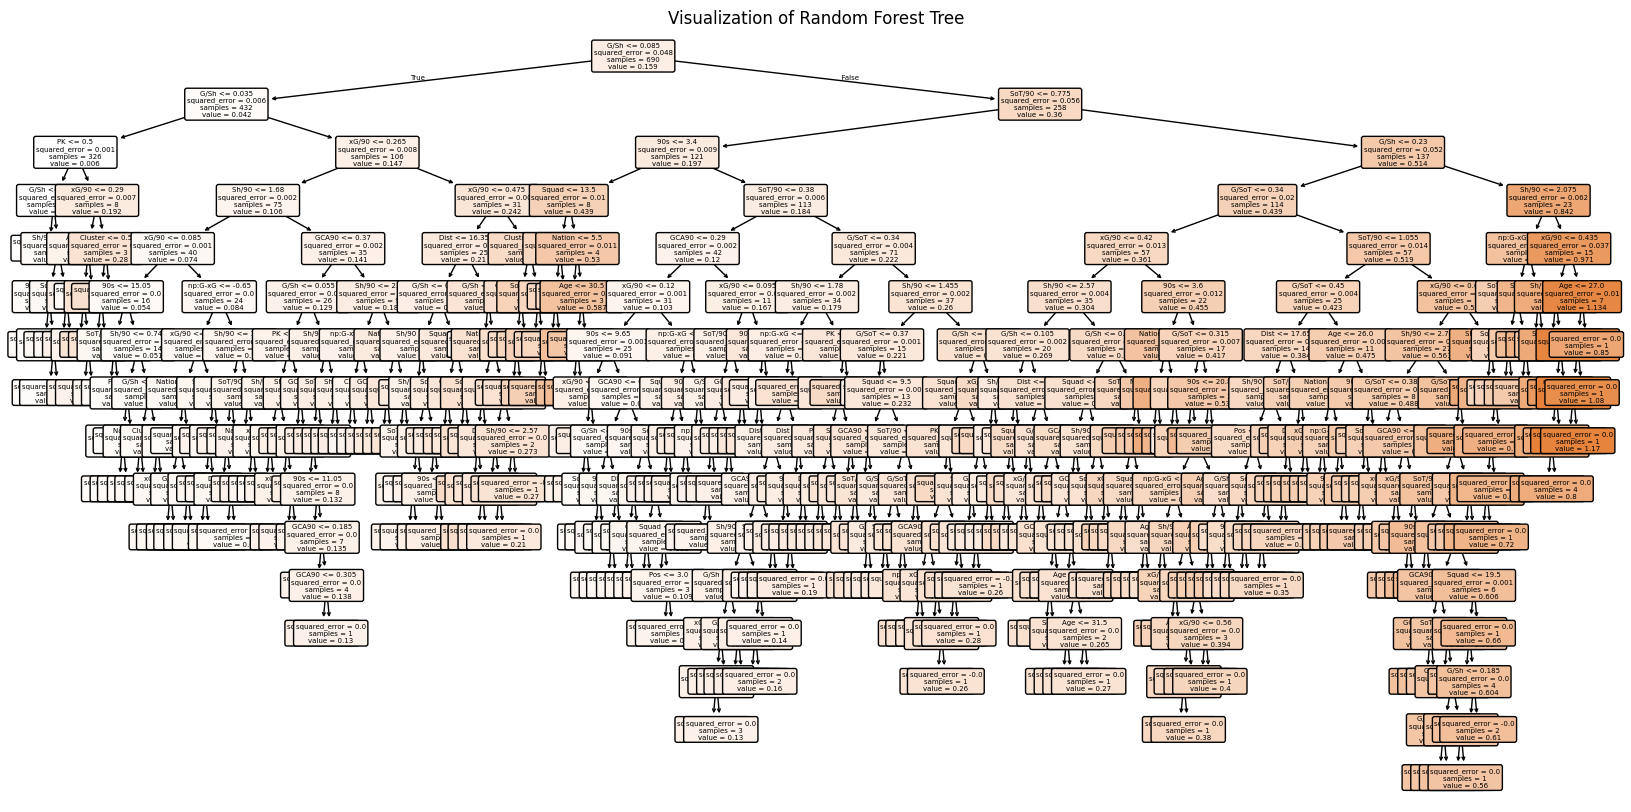

In [9]:
from sklearn.tree import plot_tree




# Select one tree to visualize 
tree = optimized_model.estimators_[0]  # Accessing the first tree from the forest

# Plot the selected tree
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=features, filled=True, rounded=True, fontsize=5)
plt.title('Visualization of Random Forest Tree')
plt.show()


In [10]:
import statsmodels.api as sm


X = data[features]  
y = data['Gls/90']  


X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Gls/90   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     304.0
Date:                Fri, 27 Dec 2024   Prob (F-statistic):               0.00
Time:                        17:40:59   Log-Likelihood:                 1215.4
No. Observations:                1352   AIC:                            -2397.
Df Residuals:                    1335   BIC:                            -2308.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0118      0.018     -0.640      0.522      -0.048       0.024
Pos           -0.0048      0.002     -3.059      0.002      -0.008      -0.002
Age            0.0013      0.001      1.927      0.054   -2.26e-05       0.003
90s            0.0002      0.000      0.618      0.536      -0.000       0.001
GCA90          0.0274      0.007      4.152      0.000       0.014       0.040
Sh/90          0.0078      0.002      3.275      0.001       0.003       0.012
SoT/90         0.0518      0.005      9.495      0.000       0.041       0.063
G/Sh           0.8943      0.050     18.001      0.000       0.797       0.992
G/SoT          0.1630      0.022      7.439      0.000       0.120       0.206
PK             0.0569      0.004     15.414      0.000       0.050       0.064
xG/90          0.1046      0.018      5.891      0.000       0.070       0.139
np:G-xG        0.0170      0.002      7.758      0.000       0.013       0.021
Dist          -0.0024      0.000     -5.512      0.000      -0.003      -0.002
Squad         -0.0004      0.000     -1.054      0.292      -0.001       0.000
Nation         0.0002      0.000      1.218      0.223      -0.000       0.000
Season         0.0016      0.003      0.613      0.540      -0.004       0.007
Cluster        0.0226      0.006      3.642      0.000       0.010       0.035
==============================================================================
Omnibus:                      488.900   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15276.604
Skew:                          -1.038   Prob(JB):                         0.00
Kurtosis:                      19.336   Cond. No.                         924.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""